In [2]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.size"] = "14"


def plot_results(dfs, show=True, save=True, xlim=5000):
    fig, ax1 = plt.subplots()
    
    from itertools import cycle
    lines = ["-","--","-.",":"]
    linecycler = cycle(lines)

    
    ax1.set_xlabel('Iter [-]')
    
    psnr_color = 'tab:red'
    ax1.set_ylabel('PSNR [dB]', color=psnr_color)
    ax1.tick_params(axis='y', labelcolor=psnr_color)
    #ax1.set_xlim(0, df['Iter'][df.index[-1]])
    ax1.set_xlim(0, xlim)
    
    ax2 = ax1.twiny()
    ax2.set_xlabel('$\Delta$t [s]')

    l1_color = 'tab:blue'
    ax3 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    ax3.set_ylabel('L1 [cm]', color=l1_color)
    ax3.set_ylim(0, 30)
    ax3.tick_params(axis='y', labelcolor=l1_color)
    
    for name, df in dfs.items():  
       
        #df = df.iloc[1: , :] # Drop first row which only has 0.0
        df = df.set_index('Iter')
        
        line_style = next(linecycler)

        
        ax1.plot(df.index, df['PSNR'], color=psnr_color, linestyle=line_style, label=name)    
        ax3.plot(df.index, df['L1'], color=l1_color, linestyle=line_style)

    ax2.set_xticks(ax1.get_xticks())
    ax2.set_xbound(ax1.get_xbound())
    xticklabels = [df['Dt'].loc[xtick].round(0).item() for xtick in ax1.get_xticks()]
    print(xticklabels)
    ax2.set_xticklabels(xticklabels)
    
    
    #ax1.legend(loc='upper center', fontsize='x-large')
    leg = ax1.legend(loc='center right')
    [lgd.set_color('black') for lgd in leg.legendHandles]

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    if show: plt.show()
    if save: 
        #fig.set_size_inches(3, 2)
        out = ''
        for name in list(dfs.keys())[:-1]:
            out += name + '_vs_'
        out += list(dfs.keys())[-1]
        print(f"Saving to: {out}")
        fig.savefig(out + '.svg', dpi=100, transparent=False, bbox_inches='tight')

[0.0, 175.0, 232.0, 280.0, 328.0, 376.0]


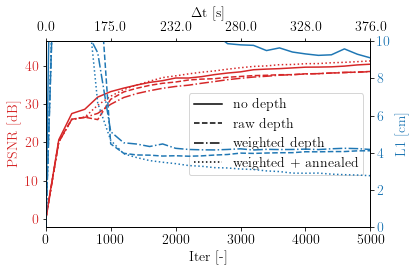

In [81]:
dfs = {
    #"ours_l1":  pd.read_csv('../room_results_ours_l1.csv'),
    "no depth": pd.read_csv('../room_results_no_depth_3.csv'),
    "raw depth": pd.read_csv('../room_results_raw_depth.csv'),
    #"raw depth (w annealing)": pd.read_csv('../room_results_raw_w_annealing.csv'),
    "weighted depth":  pd.read_csv('../room_results_ours_wo_thresh.csv'),
    #"weighted + annealed":  pd.read_csv('../room_results_ours_l2_full.csv'),
    "weighted + annealed":  pd.read_csv('../room_results_ours_w_annealing.csv'),
}
plot_results(dfs, show=True, save="room_results")

[0.0, 148.0, 335.0, 518.0, 700.0]


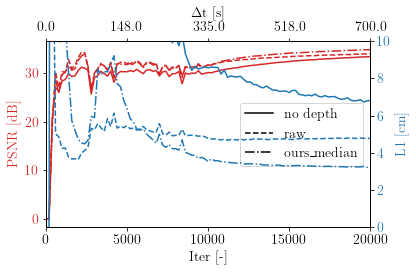

In [82]:
dfs = {
    #"ours_no_anneal_thresh": pd.read_csv('../replica_office0_ours_wo_anneal_w_thresh.csv').iloc[9:,:],
    "no depth": pd.read_csv('../replica_office0_no_depth_2.csv'),
    #"ours_median_annealed": pd.read_csv('../replica_office0_ours_median_annealed.csv'),
    #"ours_median_annealed": pd.read_csv('../replica_office0_ours_w_anneal_w_median.csv'),    
    #"ours_wo_thresh_10": pd.read_csv('../replica_office0_ours_wo_anneal_wo_thresh_3.csv'),
    #"ours_wo_thresh": pd.read_csv('../replica_office0_ours_wo_anneal_wo_thresh_2.csv'),
    "raw": pd.read_csv('../replica_office0_raw_2.csv'),
    "ours_median": pd.read_csv('../replica_office0_ours_wo_anneal_w_median.csv'),
    #"ours_median_100": pd.read_csv('../replica_office0_ours_wo_anneal_median_100_lucky.csv')
}
plot_results(dfs, show=True, save="room_results", xlim=20000)

[0.0, 1817.0, 3765.0, 5726.0, 7685.0, 9642.0]


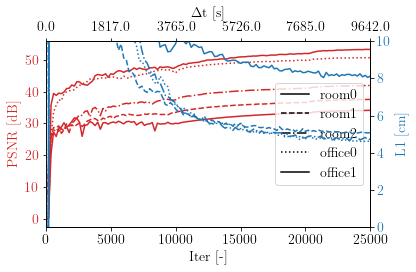

In [83]:
dfs = {
    "room0": pd.read_csv('../room0_nerf_results.csv'),
    "room1": pd.read_csv('../room1_nerf_results.csv'),
    "room2": pd.read_csv('../room2_nerf_results.csv'),
    "office0": pd.read_csv('../office0_nerf_results.csv'),
    "office1": pd.read_csv('../office1_nerf_results.csv'),
}
plot_results(dfs, show=True, save="room_results", xlim=25000)

[0.0, 320.0, 531.0, 739.0, 1280.0, 1484.0]


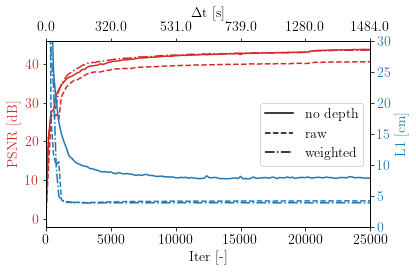

Saving to: no depth_vs_raw_vs_weighted


In [22]:
dfs = {
    "no depth": pd.read_csv('../room_nerf_no_depth_results.csv'),
    
    #"weighted+filtered": pd.read_csv('../room_nerf_ours_w_thresh_results.csv'),
    "raw": pd.read_csv('../room_nerf_raw_results.csv'),
    "weighted": pd.read_csv('../room_nerf_ours_results.csv'),
}
plot_results(dfs, show=True, save="room_results", xlim=25000)

[0.0, 120.0, 265.0, 424.0, 606.0, 789.0]


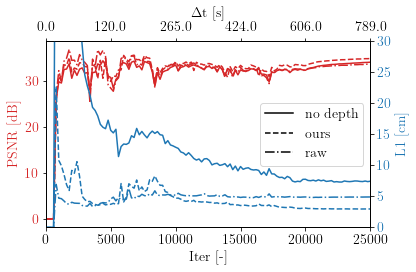

Saving to: no depth_vs_ours_vs_raw


In [3]:
dfs = {
    "no depth": pd.read_csv('../room0_nerf_no_depth_results.csv'),
    "ours": pd.read_csv('../room0_nerf_ours_results.csv'),
    "raw": pd.read_csv('../room0_nerf_raw_results.csv'),
}
plot_results(dfs, show=True, save="room0_results", xlim=25000)

[0.0, 150.0, 301.0, 472.0, 653.0, 838.0]


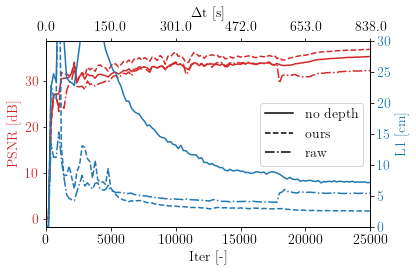

Saving to: no depth_vs_ours_vs_raw


In [4]:
dfs = {
    "no depth": pd.read_csv('../room1_nerf_no_depth_results.csv'),
    "ours": pd.read_csv('../room1_nerf_ours_results.csv'),
    "raw": pd.read_csv('../room1_nerf_raw_results.csv'),
}
plot_results(dfs, show=True, save="room0_results", xlim=25000)

[0.0, 235.0, 375.0, 530.0, 708.0, 891.0]


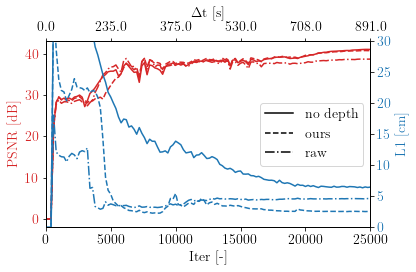

Saving to: no depth_vs_ours_vs_raw


In [5]:
dfs = {
    "no depth": pd.read_csv('../room2_nerf_no_depth_results.csv'),
    "ours": pd.read_csv('../room2_nerf_ours_results.csv'),
    "raw": pd.read_csv('../room2_nerf_raw_results.csv'),
}
plot_results(dfs, show=True, save="room0_results", xlim=25000)

[0.0, 1666.0, 1811.0, 1960.0, 2120.0, 2286.0]


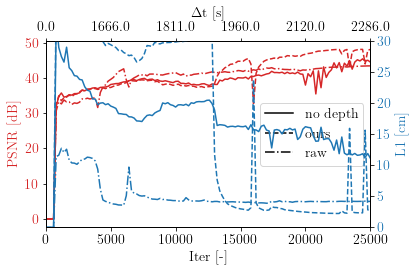

Saving to: no depth_vs_ours_vs_raw


In [6]:
dfs = {
    "no depth": pd.read_csv('../office0_nerf_no_depth_results.csv'),
    "ours": pd.read_csv('../office0_nerf_ours_results.csv'),
    "raw": pd.read_csv('../office0_nerf_raw_results.csv'),
}
plot_results(dfs, show=True, save="room0_results", xlim=25000)

[0.0, 293.0, 876.0, 1181.0, 2978.0, 4794.0]


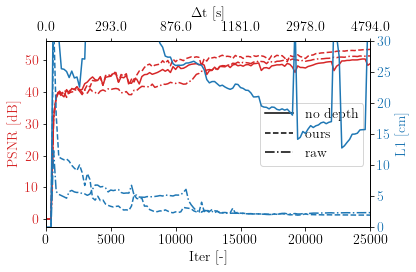

Saving to: no depth_vs_ours_vs_raw


In [7]:
dfs = {
    "no depth": pd.read_csv('../office1_nerf_no_depth_results.csv'),
    "ours": pd.read_csv('../office1_nerf_ours_results.csv'),
    "raw": pd.read_csv('../office1_nerf_raw_results.csv'),
}
plot_results(dfs, show=True, save="room0_results", xlim=25000)

[0.0, 197.0, 336.0, 504.0, 687.0, 868.0]


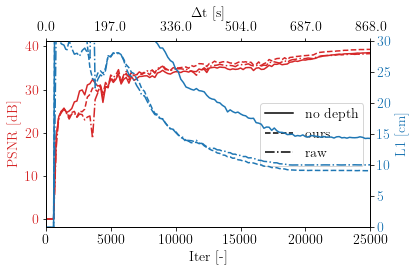

Saving to: no depth_vs_ours_vs_raw


In [8]:
dfs = {
    "no depth": pd.read_csv('../office2_nerf_no_depth_results.csv'),
    "ours": pd.read_csv('../office2_nerf_ours_results.csv'),
    "raw": pd.read_csv('../office2_nerf_raw_results.csv'),
}
plot_results(dfs, show=True, save="room0_results", xlim=25000)

[0.0, 195.0, 325.0, 472.0, 633.0, 799.0]


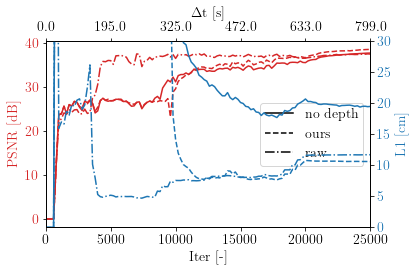

Saving to: no depth_vs_ours_vs_raw


In [9]:
dfs = {
    "no depth": pd.read_csv('../office3_nerf_no_depth_results.csv'),
    "ours": pd.read_csv('../office3_nerf_ours_results.csv'),
    "raw": pd.read_csv('../office3_nerf_raw_results.csv'),
}
plot_results(dfs, show=True, save="room0_results", xlim=25000)

[0.0, 251.0, 386.0, 537.0, 713.0, 894.0]


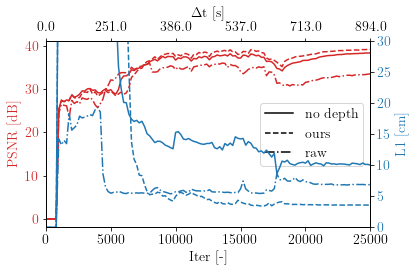

Saving to: no depth_vs_ours_vs_raw


In [10]:
dfs = {
    "no depth": pd.read_csv('../office4_nerf_no_depth_results.csv'),
    "ours": pd.read_csv('../office4_nerf_ours_results.csv'),
    "raw": pd.read_csv('../office4_nerf_raw_results.csv'),
}
plot_results(dfs, show=True, save="room0_results", xlim=25000)